In [1]:
# Long Short Term Memory
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set from local pc 
df = pd.concat(
    map(pd.read_csv, ['br1.csv']), ignore_index=True)
df.head()

,C1,C2,C3,A1,A2,A3,A4,A5,M1,E1,...,E3,E4,E5,L1,L2,S1,S2,S3,S4,level
0,13444,2807,8643,384,11469,1934,1934.0,0,13224.0,404,...,160,6,140,24,34,23.0,21.72,1922.0,1223,1
1,39028,4771,27065,1326,36049,2665,2665.0,574,38197.5,4033,...,397,32,323,40,102,71.0,65.80,2629.5,1316,1
2,46088,12044,29959,894,42451,3275,3275.0,236,46075.5,443,...,694,30,461,60,300,183.0,183.00,3444.0,2013,1
3,14247,9878,3213,54,11997,1872,1872.0,0,14619.5,272,...,125,0,94,5,49,44.0,40.68,1850.0,318,1
4,685574,255468,270436,1026,611308,51173,51173.0,420,686488.5,133368,...,6221,150,4379,542,2041,1656.0,1293.52,50514.5,63914,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658583 entries, 0 to 658582
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      658583 non-null  int64  
 1   C2      658583 non-null  int64  
 2   C3      658583 non-null  int64  
 3   A1      658583 non-null  int64  
 4   A2      658583 non-null  int64  
 5   A3      658583 non-null  int64  
 6   A4      658583 non-null  float64
 7   A5      658583 non-null  int64  
 8   M1      658583 non-null  float64
 9   E1      658583 non-null  int64  
 10  E2      658583 non-null  int64  
 11  E3      658583 non-null  int64  
 12  E4      658583 non-null  int64  
 13  E5      658583 non-null  int64  
 14  L1      658583 non-null  int64  
 15  L2      658583 non-null  int64  
 16  S1      658583 non-null  float64
 17  S2      658583 non-null  float64
 18  S3      658583 non-null  float64
 19  S4      658583 non-null  int64  
 20  level   658583 non-null  int64  
dtypes: float64

In [4]:
# Importing the training set for the year 1993-2010
X_train = df.iloc[0:658583, :20].values
y_train = df.iloc[0:658583, 20].values

<AxesSubplot:xlabel='Features', ylabel='Dollar (in thousand)'>

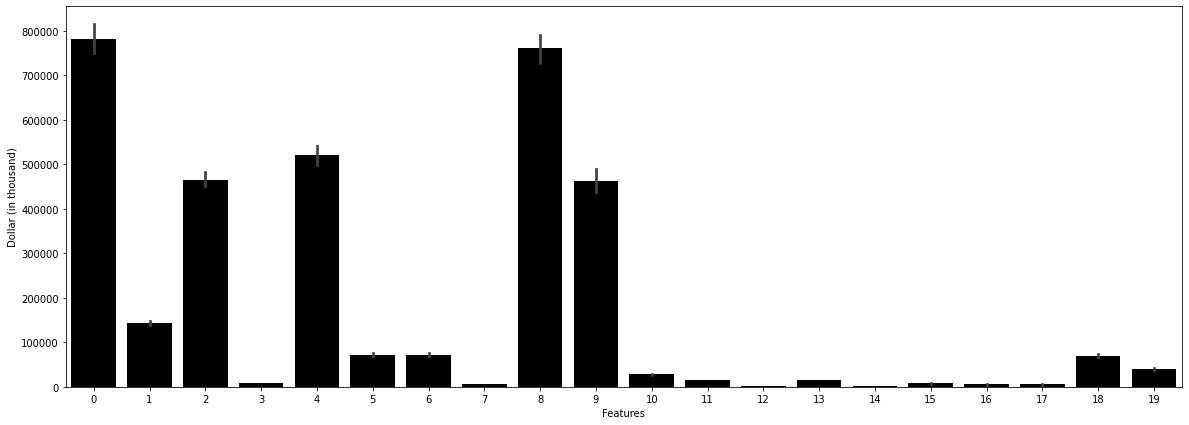

In [5]:
# # Before Feature Scaling
import seaborn as sns
plt.figure(figsize=(20, 7))
plt.xlabel('Features')
plt.ylabel('Dollar (in thousand)')
sns.barplot( data = X_train, color = "Black")

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)

<AxesSubplot:xlabel='Features', ylabel='Dollar'>

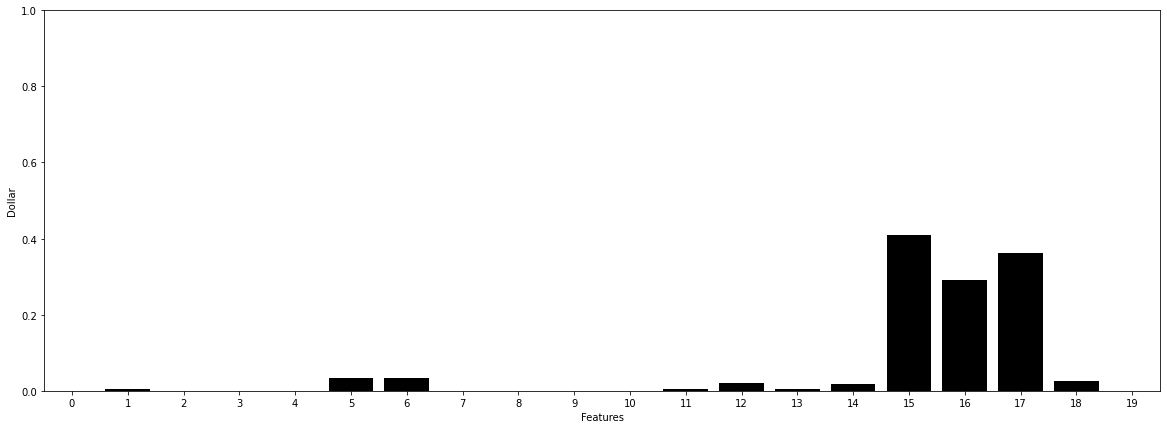

In [7]:
# # After Feature Scaling [barplot]
plt.figure(figsize=(20, 7))
plt.ylim(0,1)
plt.xlabel('Features')
plt.ylabel('Dollar')
sns.barplot( data = X_train, color = "Black")

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Part 2 - Now let's make the LSTM!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
seed_value= 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)
tf.compat.v1.keras.backend.set_session

<function keras.backend.set_session(session)>

In [11]:
# Initialising the LSTM
classifier = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 20, return_sequences = True, activation='relu'))
classifier.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 20, return_sequences = True, activation='relu'))
classifier.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 20, return_sequences = True, activation='relu'))
classifier.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 20, activation='relu'))
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 1, activation='sigmoid'))

# Compiling the LSTM
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Saving Best Model Only
import tensorflow as tf
check_point = tf.keras.callbacks.ModelCheckpoint('Best_Classification_model_for_relu.h5', monitor='accuracy', save_best_only=True)


In [13]:
# Fitting the LSTM to the Training set
classifier_history = classifier.fit(X_train, y_train, callbacks= [check_point], batch_size = 256, epochs = 5, verbose=1)

Epoch 1/5
2573/2573 [==============================] - 211s 79ms/step - loss: 0.1020 - accuracy: 0.9816
Epoch 2/5
2573/2573 [==============================] - 203s 79ms/step - loss: 0.0932 - accuracy: 0.9818
Epoch 3/5
2573/2573 [==============================] - 204s 79ms/step - loss: 0.0928 - accuracy: 0.9818
Epoch 4/5
2573/2573 [==============================] - 206s 80ms/step - loss: 0.0926 - accuracy: 0.9818
Epoch 5/5
2573/2573 [==============================] - 206s 80ms/step - loss: 0.0923 - accuracy: 0.9818


In [14]:
# Clear previous session
from tensorflow import keras
keras.backend.clear_session()

In [15]:
# # Load previously trained model
classifier_history = keras.models.load_model("Best_Classification_model_for_relu.h5")

In [16]:
# Model Summary
classifier_history.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 20)            1760      
                                                                 
 dropout (Dropout)           (None, 20, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 20)            3280      
                                                                 
 dropout_1 (Dropout)         (None, 20, 20)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 20)            3280      
                                                                 
 dropout_2 (Dropout)         (None, 20, 20)            0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                3

In [17]:
classifier.history

In [18]:
df = pd.concat(
    map(pd.read_csv, ['br2.csv','br3.csv','br4.csv','br5.csv','br6.csv','br7.csv','br8.csv','br9.csv',]), ignore_index=True)
df.head()

,C1,C2,C3,A1,A2,A3,A4,A5,M1,E1,...,E3,E4,E5,L1,L2,S1,S2,S3,S4,level
0,748370,193936,510367,7819,608084,58364,58364,6382,722377.8,74291,...,21489,5273,13439,1746,6836,4786,5113.75,56391.6,11071,1
1,510742,48485,377401,13018,420490,39545,39545,20095,517694.0,38274,...,11039,15182,13213,2068,-16309,-14085,-14085.00,45337.0,38835,1
2,501381,95552,354725,11777,393896,50955,50955,12188,500400.8,31639,...,18798,2714,12399,1319,6791,4821,5100.75,49375.4,9737,1
3,456787,405474,0,2446,416827,30052,30052,0,382101.4,0,...,13235,0,22729,3271,6269,6366,6269.00,24694.8,41518,1
4,459553,40928,347259,11410,373109,43756,43756,8301,514716.2,81355,...,12325,12626,85900,1785,-85589,-80907,-80239.60,88174.8,7862,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271845 entries, 0 to 271844
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      271845 non-null  int64  
 1   C2      271845 non-null  int64  
 2   C3      271845 non-null  int64  
 3   A1      271845 non-null  int64  
 4   A2      271845 non-null  int64  
 5   A3      271845 non-null  int64  
 6   A4      271845 non-null  int64  
 7   A5      271845 non-null  int64  
 8   M1      271845 non-null  float64
 9   E1      271845 non-null  int64  
 10  E2      271845 non-null  int64  
 11  E3      271845 non-null  int64  
 12  E4      271845 non-null  int64  
 13  E5      271845 non-null  int64  
 14  L1      271845 non-null  int64  
 15  L2      271845 non-null  int64  
 16  S1      271845 non-null  int64  
 17  S2      271845 non-null  float64
 18  S3      271845 non-null  float64
 19  S4      271845 non-null  int64  
 20  level   271845 non-null  int64  
dtypes: float64

In [20]:
# Importing the test set for the rest years
X_test = df.iloc[0:271845, :20].values
y_test = df.iloc[0:271845, 20].values

In [21]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_test = sc.fit_transform(X_test)

In [22]:
# Reshaping the test set for the rest years
X_test = sc.transform(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
# Part 3 - Making predictions and evaluating the model
# Predicting the Test set results for the rest years
y_pred = classifier_history.predict(X_test)
y_pred = (y_pred > 0.5)

In [24]:
# Model evaluation for the rest years
classifier_history.evaluate(X_test, y_test)

8496/8496 [==============================] - 59s 7ms/step - loss: 0.0694 - accuracy: 0.9872


[0.06935951858758926, 0.9872206449508667]

In [25]:
# Precison, Recall & fscore for the rest years
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

C:\Users\Lenovo\anaconda3\envs\tensorlfow-sessions\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9746046292233442, 0.9872206588313193, 0.9808720786915603, None)